Using device: cuda:0
Epoch 1/25 loss: 1.3908, val accuracy: 61.23%
Epoch 2/25 loss: 0.9671, val accuracy: 64.24%
Epoch 3/25 loss: 0.8900, val accuracy: 68.40%
Epoch 4/25 loss: 0.8010, val accuracy: 69.68%
Epoch 5/25 loss: 0.7861, val accuracy: 73.61%
Epoch 6/25 loss: 0.7587, val accuracy: 74.19%
Epoch 7/25 loss: 0.7551, val accuracy: 71.88%
Epoch 8/25 loss: 0.7198, val accuracy: 76.85%
Epoch 9/25 loss: 0.6982, val accuracy: 75.35%
Epoch 10/25 loss: 0.6616, val accuracy: 78.59%
Epoch 11/25 loss: 0.7019, val accuracy: 74.88%
Epoch 12/25 loss: 0.6859, val accuracy: 74.07%
Epoch 13/25 loss: 0.6584, val accuracy: 75.58%
Epoch 14/25 loss: 0.6479, val accuracy: 76.39%
Epoch 15/25 loss: 0.6517, val accuracy: 77.78%
Epoch 16/25 loss: 0.6463, val accuracy: 77.08%
Epoch 17/25 loss: 0.6294, val accuracy: 77.08%
Epoch 18/25 loss: 0.6171, val accuracy: 79.17%
Epoch 19/25 loss: 0.6189, val accuracy: 77.55%
Epoch 20/25 loss: 0.6291, val accuracy: 77.78%
Epoch 21/25 loss: 0.6017, val accuracy: 77.31%
E

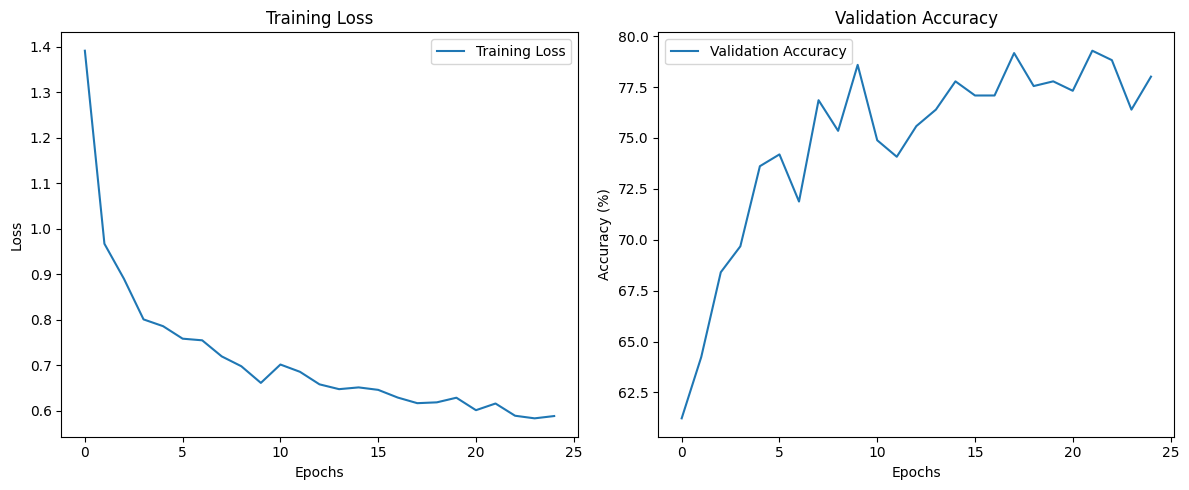

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Check if GPU is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set up the paths to your training and validation data
train_dir = '/home/bhavik/Downloads/YOLO_ME338/train'
validation_dir = '/home/bhavik/Downloads/YOLO_ME338/validation'

# Set up the image data generators
transform = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(40),
    transforms.RandomResizedCrop(200),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
validation_dataset = datasets.ImageFolder(validation_dir, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=16, shuffle=False)

# Load the pretrained VGG16 model
model = models.vgg16(pretrained=True)
for param in model.features.parameters():
    param.requires_grad = False

# Modify the classifier of VGG16
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(inplace=True),
    nn.Linear(256, 16),  # Assuming we have 16 classes
    nn.LogSoftmax(dim=1)
)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)

# Initialize lists to store per-epoch loss and accuracy
train_losses = []
val_accuracies = []

# Train the model
epochs = 25  # You can adjust the number of epochs
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)

    # Validation loop
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}/{epochs} loss: {epoch_loss:.4f}, val accuracy: {val_accuracy:.2f}%')

# Plot the training loss and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Using device: cuda:0


/home/bhavik/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/bhavik/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 117MB/s]


Epoch 1/25 loss: 2.1264, val accuracy: 50.00%
Epoch 2/25 loss: 1.4851, val accuracy: 59.49%
Epoch 3/25 loss: 1.2622, val accuracy: 66.32%
Epoch 4/25 loss: 1.1218, val accuracy: 65.05%
Epoch 5/25 loss: 1.0615, val accuracy: 68.87%
Epoch 6/25 loss: 1.0063, val accuracy: 67.59%
Epoch 7/25 loss: 0.9834, val accuracy: 68.98%
Epoch 8/25 loss: 0.9412, val accuracy: 74.42%
Epoch 9/25 loss: 0.9028, val accuracy: 71.30%
Epoch 10/25 loss: 0.8781, val accuracy: 71.64%
Epoch 11/25 loss: 0.8630, val accuracy: 75.58%
Epoch 12/25 loss: 0.8509, val accuracy: 74.07%
Epoch 13/25 loss: 0.8379, val accuracy: 75.12%
Epoch 14/25 loss: 0.8189, val accuracy: 71.53%
Epoch 15/25 loss: 0.8151, val accuracy: 75.69%
Epoch 16/25 loss: 0.7976, val accuracy: 77.08%
Epoch 17/25 loss: 0.8028, val accuracy: 75.69%
Epoch 18/25 loss: 0.8267, val accuracy: 75.23%
Epoch 19/25 loss: 0.7788, val accuracy: 75.23%
Epoch 20/25 loss: 0.7811, val accuracy: 76.97%
Epoch 21/25 loss: 0.8124, val accuracy: 73.38%
Epoch 22/25 loss: 0.79

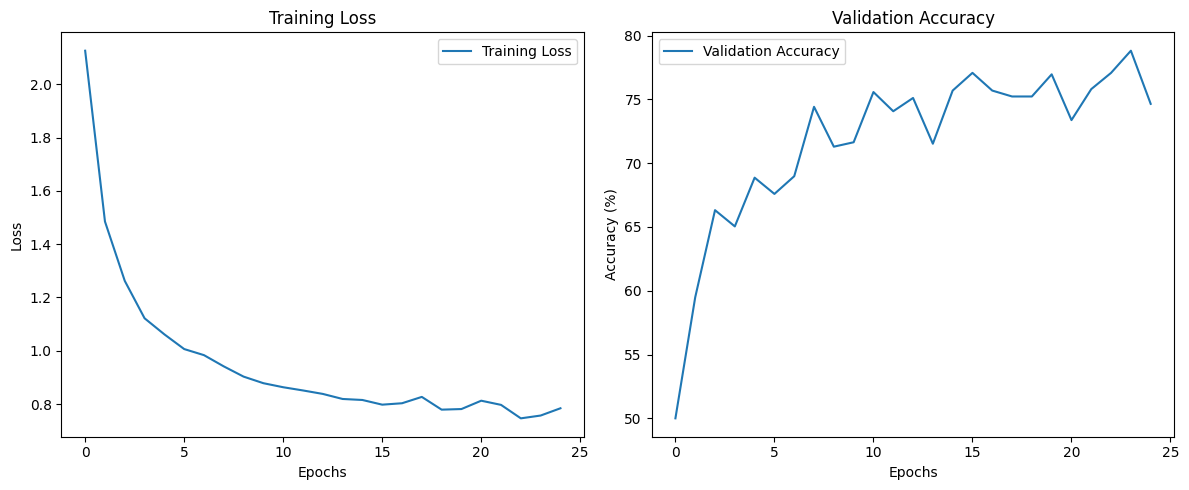

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Check if GPU is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set up the paths to your training and validation data
train_dir = '/home/bhavik/Downloads/YOLO_ME338/train'
validation_dir = '/home/bhavik/Downloads/YOLO_ME338/validation'

# Set up the image data generators
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet50 expects 224x224 input
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(40),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
validation_dataset = datasets.ImageFolder(validation_dir, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=16, shuffle=False)

# Load the pretrained ResNet50 model
model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer (fc) to match the number of classes (16 in this case)
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(inplace=True),
    nn.Linear(256, 16),  # Assuming we have 16 classes
    nn.LogSoftmax(dim=1)
)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=1e-4)

# Initialize lists to store per-epoch loss and accuracy
train_losses = []
val_accuracies = []

# Train the model
epochs = 25  # Adjust the number of epochs if needed
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)

    # Validation loop
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}/{epochs} loss: {epoch_loss:.4f}, val accuracy: {val_accuracy:.2f}%')

# Plot the training loss and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


/home/bhavik/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /home/bhavik/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


Using device: cuda:0


100%|██████████| 30.8M/30.8M [00:00<00:00, 116MB/s]


Epoch 1/25 loss: 2.2841, val accuracy: 49.42%
Epoch 2/25 loss: 1.6264, val accuracy: 55.32%
Epoch 3/25 loss: 1.3566, val accuracy: 60.42%
Epoch 4/25 loss: 1.2209, val accuracy: 64.24%
Epoch 5/25 loss: 1.1313, val accuracy: 65.86%
Epoch 6/25 loss: 1.0517, val accuracy: 67.25%
Epoch 7/25 loss: 1.0191, val accuracy: 69.56%
Epoch 8/25 loss: 0.9718, val accuracy: 72.45%
Epoch 9/25 loss: 0.9308, val accuracy: 73.38%
Epoch 10/25 loss: 0.9084, val accuracy: 73.84%
Epoch 11/25 loss: 0.9088, val accuracy: 74.77%
Epoch 12/25 loss: 0.8534, val accuracy: 74.07%
Epoch 13/25 loss: 0.8801, val accuracy: 73.38%
Epoch 14/25 loss: 0.8269, val accuracy: 76.04%
Epoch 15/25 loss: 0.8045, val accuracy: 75.00%
Epoch 16/25 loss: 0.7906, val accuracy: 78.01%
Epoch 17/25 loss: 0.8027, val accuracy: 75.93%
Epoch 18/25 loss: 0.7526, val accuracy: 79.05%
Epoch 19/25 loss: 0.7709, val accuracy: 75.35%
Epoch 20/25 loss: 0.7723, val accuracy: 79.98%
Epoch 21/25 loss: 0.7445, val accuracy: 77.55%
Epoch 22/25 loss: 0.75

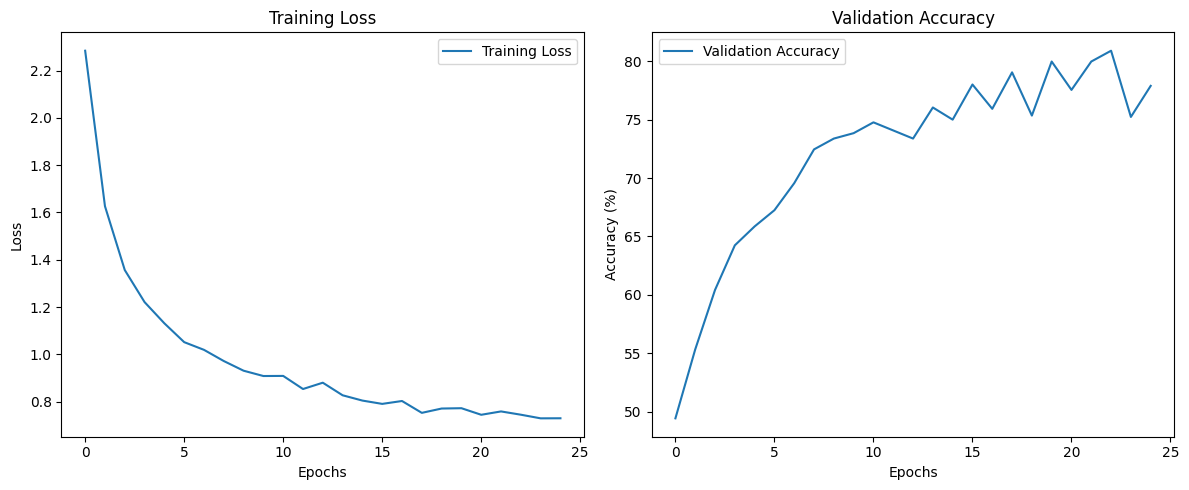

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Check if GPU is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set up the paths to your training and validation data
# Set up the paths to your training and validation data
train_dir = '/home/bhavik/Downloads/YOLO_ME338/train'
validation_dir = '/home/bhavik/Downloads/YOLO_ME338/validation'

# Set up the image data generators
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # DenseNet121 expects 224x224 input
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(40),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
validation_dataset = datasets.ImageFolder(validation_dir, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=16, shuffle=False)

# Load the pretrained DenseNet121 model
model = models.densenet121(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the classifier layer (classifier) to match the number of classes (assuming 16 in this case)
num_ftrs = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(inplace=True),
    nn.Linear(256, 16),  # Assuming we have 16 classes
    nn.LogSoftmax(dim=1)
)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)

# Initialize lists to store per-epoch loss and accuracy
train_losses = []
val_accuracies = []

# Train the model
epochs = 25  # Adjust the number of epochs if needed
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)

    # Validation loop
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}/{epochs} loss: {epoch_loss:.4f}, val accuracy: {val_accuracy:.2f}%')

# Plot the training loss and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Using device: cuda:0
Epoch 1/25 loss: 2.3380, val accuracy: 39.00%
Epoch 2/25 loss: 1.8122, val accuracy: 51.27%
Epoch 3/25 loss: 1.5579, val accuracy: 57.41%
Epoch 4/25 loss: 1.4268, val accuracy: 59.72%
Epoch 5/25 loss: 1.3335, val accuracy: 65.97%
Epoch 6/25 loss: 1.2763, val accuracy: 65.74%
Epoch 7/25 loss: 1.2228, val accuracy: 67.94%
Epoch 8/25 loss: 1.1741, val accuracy: 68.29%
Epoch 9/25 loss: 1.1407, val accuracy: 68.63%
Epoch 10/25 loss: 1.1313, val accuracy: 70.02%
Epoch 11/25 loss: 1.0719, val accuracy: 70.02%
Epoch 12/25 loss: 1.0314, val accuracy: 68.87%
Epoch 13/25 loss: 1.0458, val accuracy: 71.06%
Epoch 14/25 loss: 1.0212, val accuracy: 72.69%
Epoch 15/25 loss: 1.0090, val accuracy: 72.80%
Epoch 16/25 loss: 1.0084, val accuracy: 72.22%
Epoch 17/25 loss: 0.9803, val accuracy: 72.57%
Epoch 18/25 loss: 0.9881, val accuracy: 74.88%
Epoch 19/25 loss: 0.9526, val accuracy: 76.04%
Epoch 20/25 loss: 0.9325, val accuracy: 74.42%
Epoch 21/25 loss: 0.9196, val accuracy: 72.92%
E

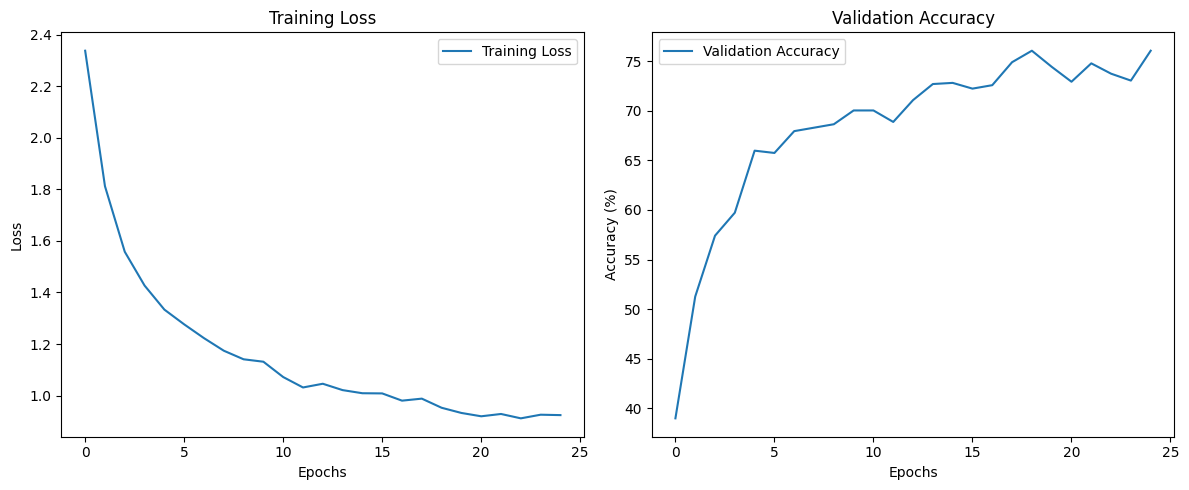

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Check if GPU is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set up the paths to your training and validation data
# Set up the paths to your training and validation data
train_dir = '/home/bhavik/Downloads/YOLO_ME338/train'
validation_dir = '/home/bhavik/Downloads/YOLO_ME338/validation'

# Set up the image data generators
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # MobileNetV2 expects 224x224 input
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(40),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
validation_dataset = datasets.ImageFolder(validation_dir, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=16, shuffle=False)

# Load the pretrained MobileNetV2 model
model = models.mobilenet_v2(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the classifier layer to match the number of classes (assuming 16 in this case)
model.classifier[1] = nn.Linear(model.last_channel, 16)  # Assuming we have 16 classes

model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier[1].parameters(), lr=1e-4)

# Initialize lists to store per-epoch loss and accuracy
train_losses = []
val_accuracies = []

# Train the model
epochs = 25  # Adjust the number of epochs if needed
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)

    # Validation loop
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}/{epochs} loss: {epoch_loss:.4f}, val accuracy: {val_accuracy:.2f}%')

# Plot the training loss and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [2]:
pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8x-cls.pt')  # load a pretrained model (recommended for training)

# Train the model+

results = model.train(data='/home/bhavik/Downloads/YOLO_ME338', epochs=25, imgsz=640)

100%|██████████| 110M/110M [00:02<00:00, 39.6MB/s] 
Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA RTX A4000, 16106MiB)
engine/trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=/home/bhavik/Downloads/YOLO_ME338, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=No